In [2]:
import tensorflow as tf 
from tensorflow import keras 
import matplotlib.pyplot as plt 
import numpy as np 

In [4]:
(x_train , y_train) , (x_test, y_test) = keras.datasets.mnist.load_data()
len(x_train)
len(x_test)

10000

In [6]:
x_train[0].shape

(28, 28)

In [7]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

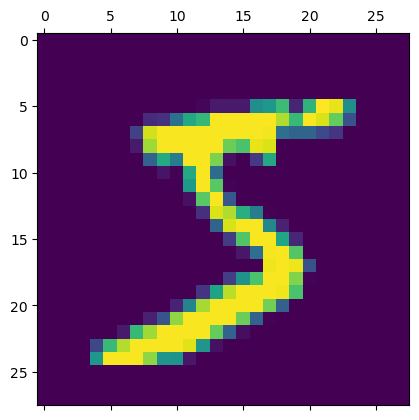

In [8]:
plt.matshow(x_train[0])

In [12]:
y_train[0]

5

In [14]:
x_train.shape

(60000, 28, 28)

In [23]:
x_train = x_train/255
x_test = x_test/255

In [24]:
x_train_flattened = x_train.reshape(len(x_train),28*28)
x_test_flattened = x_test.reshape(len(x_test), 28*28)

x_train_flattened.shape
x_test_flattened.shape

(10000, 784)

In [25]:
x_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [26]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape =(784,), activation = 'sigmoid')
])

model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
    )

model.fit(x_train_flattened, y_train, epochs = 5)

C:\Users\Muhammad Umar\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 729us/step - accuracy: 0.8202 - loss: 0.7136
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 745us/step - accuracy: 0.9134 - loss: 0.3136
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 831us/step - accuracy: 0.9195 - loss: 0.2860
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 774us/step - accuracy: 0.9243 - loss: 0.2737
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 737us/step - accuracy: 0.9260 - loss: 0.2635


In [27]:
model.evaluate(x_test_flattened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 628us/step - accuracy: 0.9143 - loss: 0.3065


[0.2695648968219757, 0.925599992275238]

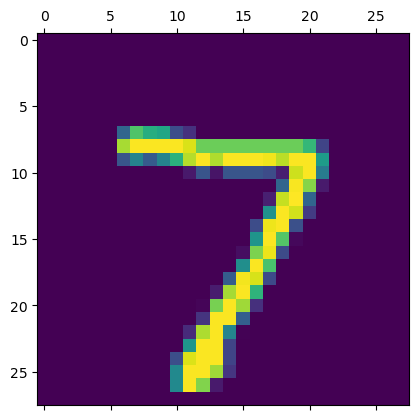

In [28]:
plt.matshow(x_test[0])

In [30]:
y_predicted = model.predict(x_test_flattened)
y_predicted[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 553us/step


array([4.2122927e-02, 4.5054378e-07, 6.6251211e-02, 9.6862400e-01,
       4.4967872e-03, 1.3317448e-01, 2.7623212e-06, 9.9988019e-01,
       1.6744795e-01, 7.0580071e-01], dtype=float32)

In [32]:
np.argmax(y_predicted[0])

7

In [33]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [34]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [35]:
cm = tf.math.confusion_matrix(labels=y_test, predictions =y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 960,    0,    0,    2,    0,    5,    9,    3,    1,    0],
       [   0, 1110,    3,    2,    0,    1,    4,    2,   13,    0],
       [   7,    8,  917,   18,    7,    2,   12,   11,   47,    3],
       [   2,    0,   17,  925,    0,   19,    3,   12,   26,    6],
       [   1,    1,    2,    2,  922,    0,   14,    4,   10,   26],
       [  11,    3,    2,   39,   11,  753,   19,    9,   37,    8],
       [   9,    3,    5,    1,    7,    7,  921,    2,    3,    0],
       [   1,    5,   20,    7,    6,    0,    0,  963,    5,   21],
       [   8,    6,    6,   18,    8,   20,   11,   12,  880,    5],
       [  11,    7,    1,   11,   31,    4,    0,   30,    9,  905]])>

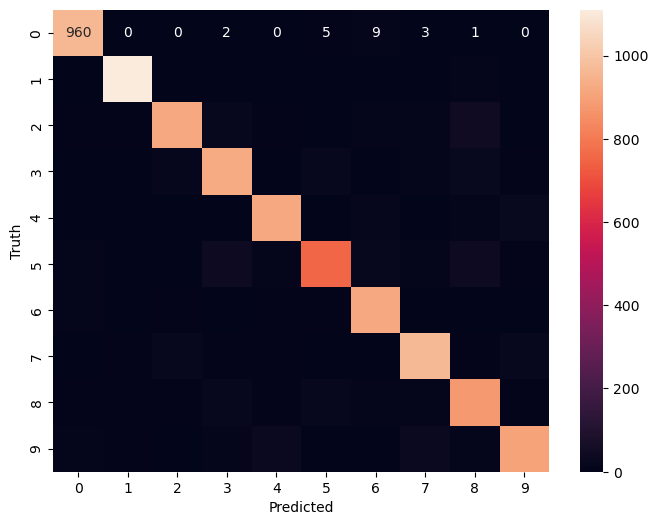

In [44]:
import seaborn as sns 
plt.figure(figsize = (8,6))
sns.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [55]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation = 'relu'),
    keras.layers.Dense(10, activation ='sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(x_train_flattened, y_train, epochs = 5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8679 - loss: 0.4627
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9629 - loss: 0.1282
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9746 - loss: 0.0842
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9807 - loss: 0.0644
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9856 - loss: 0.0489


In [56]:
model.evaluate(x_test_flattened,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9745 - loss: 0.0810


[0.07060402631759644, 0.9768999814987183]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Text(70.72222222222221, 0.5, 'Truth')

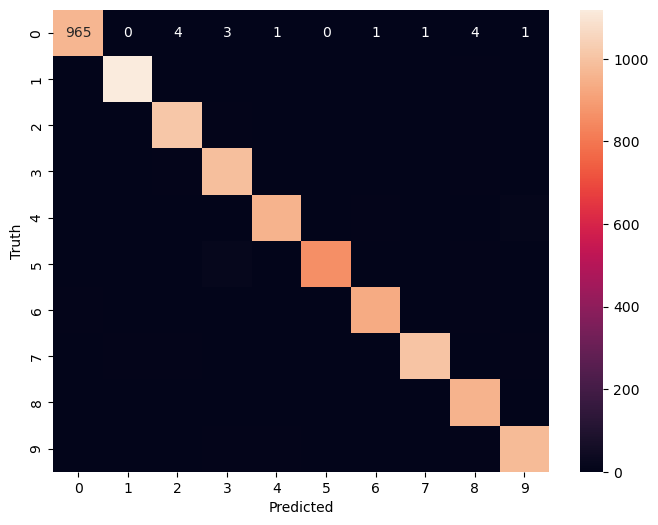

In [57]:
y_predicted = model.predict(x_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test, predictions =y_predicted_labels)

plt.figure(figsize = (8,6))
sns.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

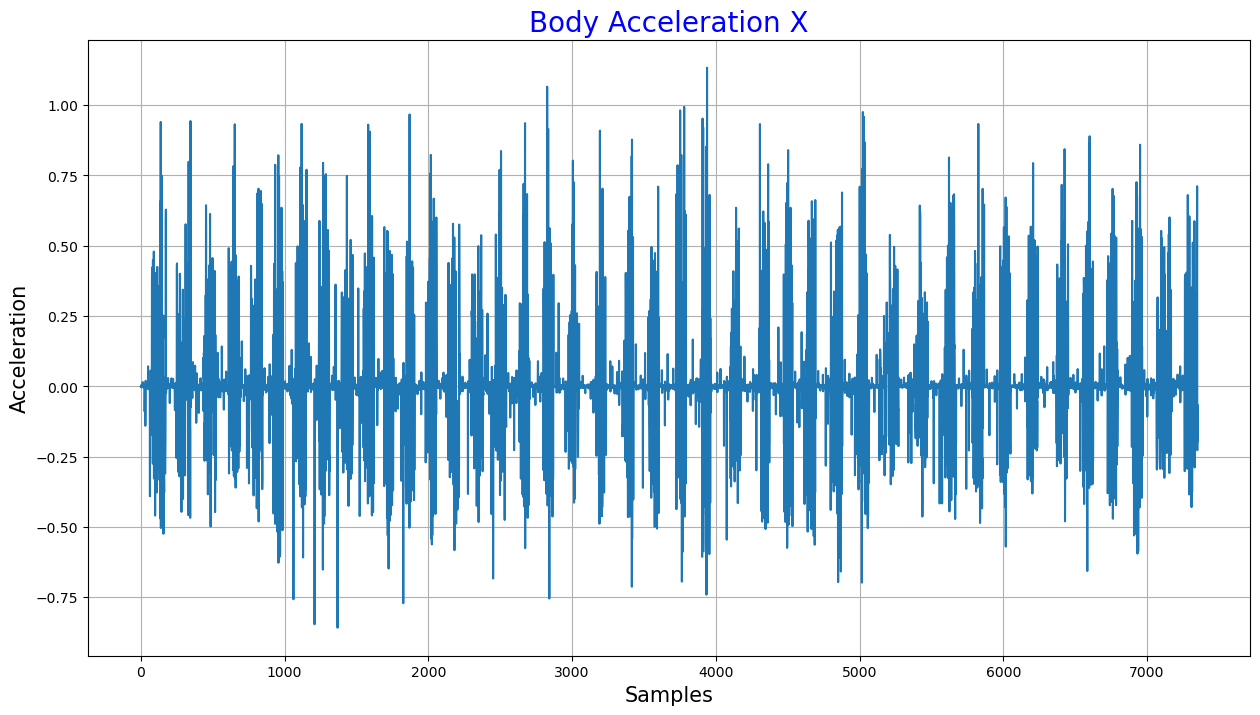

In [1]:

# Import library
import requests, zipfile 
import io
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.fft import fft, fftfreq

# Download data from the source
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.zip'
r = requests.get(url, allow_redirects=True)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall(path='tmp/') # extract all data in tmp folder

#change dir to the folder with data
os.chdir('tmp/UCI HAR Dataset/train/Inertial Signals')

# The body acceleration signal obtained by subtracting the gravity from the total acceleration.
df = pd.read_csv('body_acc_x_train.txt', header=None, delim_whitespace=True) # Every row shows a 128 element vector

# We want only one acquisition, so
acquisition = df[0]

# Let's look at the data
acquisition.plot(figsize = [15,8])
plt.title("Body Acceleration X",size = 20, color = 'b')
plt.xlabel("Samples", size=15)
plt.ylabel("Acceleration", size=15)
plt.grid()

In [4]:
FEATURES = ['MIN','MAX','MEAN','RMS','VAR','STD','POWER','PEAK','P2P','CREST FACTOR','SKEW','KURTOSIS',
            'MAX_f','SUM_f','MEAN_f','VAR_f','PEAK_f','SKEW_f','KURTOSIS_f']

def features_extraction(df): 
    
    
    Min=[];Max=[];Mean=[];Rms=[];Var=[];Std=[];Power=[];Peak=[];Skew=[];Kurtosis=[];P2p=[];CrestFactor=[];
    FormFactor=[]; PulseIndicator=[];
    Max_f=[];Sum_f=[];Mean_f=[];Var_f=[];Peak_f=[];Skew_f=[];Kurtosis_f=[]
    
    X = df.values
    ## TIME DOMAIN ##

    Min.append(np.min(X))
    Max.append(np.max(X))
    Mean.append(np.mean(X))
    Rms.append(np.sqrt(np.mean(X**2)))
    Var.append(np.var(X))
    Std.append(np.std(X))
    Power.append(np.mean(X**2))
    Peak.append(np.max(np.abs(X)))
    P2p.append(np.ptp(X))
    CrestFactor.append(np.max(np.abs(X))/np.sqrt(np.mean(X**2)))
    Skew.append(stats.skew(X))
    Kurtosis.append(stats.kurtosis(X))
    FormFactor.append(np.sqrt(np.mean(X**2))/np.mean(X))
    PulseIndicator.append(np.max(np.abs(X))/np.mean(X))
    ## FREQ DOMAIN ##
    ft = fft(X)
    S = np.abs(ft**2)/len(df)
    Max_f.append(np.max(S))
    Sum_f.append(np.sum(S))
    Mean_f.append(np.mean(S))
    Var_f.append(np.var(S))
    
    Peak_f.append(np.max(np.abs(S)))
    Skew_f.append(stats.skew(X))
    Kurtosis_f.append(stats.kurtosis(X))
    #Create dataframe from features
    df_features = pd.DataFrame(index = [FEATURES], 
                               data = [Min,Max,Mean,Rms,Var,Std,Power,Peak,P2p,CrestFactor,Skew,Kurtosis,
                                       Max_f,Sum_f,Mean_f,Var_f,Peak_f,Skew_f,Kurtosis_f])
    return df_features
